In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [9]:
# Building Model CNN

model = Sequential()
model.add(Conv1D(filters=100, kernel_size=2, activation='relu', input_shape=(5,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0729 14:54:24.661418 20844 deprecation_wrapper.py:119] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [10]:
r = model.fit(x_train.reshape(148, 5, 1), y_train, epochs=1000, validation_data=(x_test.reshape(37, 5, 1), y_test))

W0729 14:54:26.232384 20844 deprecation_wrapper.py:119] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 0s 2ms/step - loss: 0.5078 - val_loss: 1.0370
Epoch 2/1000
148/148 [==============================] - 0s 175us/step - loss: 0.2512 - val_loss: 0.5820
Epoch 3/1000
148/148 [==============================] - 0s 155us/step - loss: 0.1132 - val_loss: 0.3141
Epoch 4/1000
148/148 [==============================] - 0s 182us/step - loss: 0.0348 - val_loss: 0.1042
Epoch 5/1000
148/148 [==============================] - 0s 141us/step - loss: 0.0072 - val_loss: 0.0085
Epoch 6/1000
148/148 [==============================] - 0s 182us/step - loss: 0.0053 - val_loss: 0.0071
Epoch 7/1000
148/148 [==============================] - 0s 157us/step - loss: 0.0051 - val_loss: 0.0179
Epoch 8/1000
148/148 [==============================] - 0s 169us/step - loss: 0.0052 - val_loss: 0.0054
Epoch 9/1000
148/148 [==============================] - 0s 142us/step - loss: 0.0032 - val_loss: 5.6714e-04
Epoch 10/1000
148

148/148 [==============================] - 0s 158us/step - loss: 2.3248e-07 - val_loss: 9.3092e-07
Epoch 75/1000
148/148 [==============================] - 0s 168us/step - loss: 2.1366e-07 - val_loss: 6.0474e-07
Epoch 76/1000
148/148 [==============================] - 0s 135us/step - loss: 2.0020e-07 - val_loss: 5.4260e-07
Epoch 77/1000
148/148 [==============================] - 0s 151us/step - loss: 1.9265e-07 - val_loss: 5.0994e-07
Epoch 78/1000
148/148 [==============================] - 0s 135us/step - loss: 1.8704e-07 - val_loss: 4.9225e-07
Epoch 79/1000
148/148 [==============================] - 0s 148us/step - loss: 1.7324e-07 - val_loss: 4.6651e-07
Epoch 80/1000
148/148 [==============================] - 0s 155us/step - loss: 1.6444e-07 - val_loss: 5.3412e-07
Epoch 81/1000
148/148 [==============================] - 0s 128us/step - loss: 1.5481e-07 - val_loss: 3.9847e-07
Epoch 82/1000
148/148 [==============================] - 0s 121us/step - loss: 1.5173e-07 - val_loss: 2.4214e-

Epoch 146/1000
148/148 [==============================] - 0s 162us/step - loss: 6.8153e-08 - val_loss: 2.2288e-08
Epoch 147/1000
148/148 [==============================] - 0s 128us/step - loss: 7.2486e-08 - val_loss: 9.4585e-09
Epoch 148/1000
148/148 [==============================] - 0s 121us/step - loss: 7.1893e-08 - val_loss: 9.3903e-09
Epoch 149/1000
148/148 [==============================] - 0s 142us/step - loss: 7.1263e-08 - val_loss: 2.4606e-08
Epoch 150/1000
148/148 [==============================] - 0s 128us/step - loss: 7.3076e-08 - val_loss: 1.7106e-08
Epoch 151/1000
148/148 [==============================] - 0s 121us/step - loss: 6.7657e-08 - val_loss: 1.4304e-08
Epoch 152/1000
148/148 [==============================] - 0s 128us/step - loss: 7.0266e-08 - val_loss: 8.9134e-09
Epoch 153/1000
148/148 [==============================] - 0s 128us/step - loss: 7.0440e-08 - val_loss: 1.0456e-08
Epoch 154/1000
148/148 [==============================] - 0s 148us/step - loss: 6.7195e-

Epoch 218/1000
148/148 [==============================] - 0s 148us/step - loss: 5.0815e-08 - val_loss: 4.0048e-08
Epoch 219/1000
148/148 [==============================] - 0s 168us/step - loss: 4.9073e-08 - val_loss: 2.8607e-08
Epoch 220/1000
148/148 [==============================] - 0s 128us/step - loss: 4.7516e-08 - val_loss: 1.4039e-08
Epoch 221/1000
148/148 [==============================] - 0s 121us/step - loss: 4.9069e-08 - val_loss: 9.9693e-09
Epoch 222/1000
148/148 [==============================] - 0s 128us/step - loss: 4.6659e-08 - val_loss: 1.7886e-08
Epoch 223/1000
148/148 [==============================] - 0s 125us/step - loss: 4.7774e-08 - val_loss: 1.2756e-08
Epoch 224/1000
148/148 [==============================] - 0s 128us/step - loss: 4.7607e-08 - val_loss: 1.1551e-08
Epoch 225/1000
148/148 [==============================] - 0s 121us/step - loss: 4.6081e-08 - val_loss: 9.7848e-09
Epoch 226/1000
148/148 [==============================] - 0s 128us/step - loss: 4.7672e-

Epoch 290/1000
148/148 [==============================] - 0s 148us/step - loss: 3.4158e-08 - val_loss: 1.1131e-08
Epoch 291/1000
148/148 [==============================] - 0s 121us/step - loss: 3.4899e-08 - val_loss: 1.0388e-08
Epoch 292/1000
148/148 [==============================] - 0s 155us/step - loss: 3.4577e-08 - val_loss: 1.0111e-08
Epoch 293/1000
148/148 [==============================] - 0s 128us/step - loss: 3.3380e-08 - val_loss: 1.3301e-08
Epoch 294/1000
148/148 [==============================] - 0s 128us/step - loss: 3.3743e-08 - val_loss: 1.0433e-08
Epoch 295/1000
148/148 [==============================] - 0s 128us/step - loss: 3.4119e-08 - val_loss: 1.0197e-08
Epoch 296/1000
148/148 [==============================] - 0s 128us/step - loss: 3.5287e-08 - val_loss: 1.2000e-08
Epoch 297/1000
148/148 [==============================] - 0s 142us/step - loss: 3.5687e-08 - val_loss: 1.0333e-08
Epoch 298/1000
148/148 [==============================] - 0s 135us/step - loss: 4.0939e-

Epoch 362/1000
148/148 [==============================] - 0s 162us/step - loss: 2.0287e-08 - val_loss: 1.0428e-08
Epoch 363/1000
148/148 [==============================] - 0s 148us/step - loss: 2.1553e-08 - val_loss: 1.4710e-08
Epoch 364/1000
148/148 [==============================] - 0s 128us/step - loss: 2.0751e-08 - val_loss: 1.1088e-08
Epoch 365/1000
148/148 [==============================] - 0s 121us/step - loss: 2.0146e-08 - val_loss: 1.0561e-08
Epoch 366/1000
148/148 [==============================] - 0s 135us/step - loss: 1.9816e-08 - val_loss: 1.5780e-08
Epoch 367/1000
148/148 [==============================] - 0s 121us/step - loss: 1.9506e-08 - val_loss: 1.2236e-08
Epoch 368/1000
148/148 [==============================] - 0s 135us/step - loss: 1.9195e-08 - val_loss: 1.0542e-08
Epoch 369/1000
148/148 [==============================] - 0s 135us/step - loss: 2.0884e-08 - val_loss: 1.2013e-08
Epoch 370/1000
148/148 [==============================] - 0s 142us/step - loss: 2.2612e-

Epoch 434/1000
148/148 [==============================] - 0s 141us/step - loss: 1.6458e-08 - val_loss: 1.3913e-08
Epoch 435/1000
148/148 [==============================] - 0s 135us/step - loss: 5.5266e-08 - val_loss: 1.2441e-08
Epoch 436/1000
148/148 [==============================] - 0s 128us/step - loss: 5.8773e-08 - val_loss: 1.2896e-08
Epoch 437/1000
148/148 [==============================] - 0s 121us/step - loss: 8.4293e-08 - val_loss: 1.1915e-08
Epoch 438/1000
148/148 [==============================] - 0s 128us/step - loss: 2.5685e-08 - val_loss: 1.2886e-08
Epoch 439/1000
148/148 [==============================] - 0s 431us/step - loss: 2.3572e-08 - val_loss: 1.2019e-08
Epoch 440/1000
148/148 [==============================] - 0s 121us/step - loss: 1.2981e-08 - val_loss: 1.1182e-08
Epoch 441/1000
148/148 [==============================] - 0s 121us/step - loss: 1.2417e-08 - val_loss: 1.1467e-08
Epoch 442/1000
148/148 [==============================] - 0s 162us/step - loss: 1.0765e-

Epoch 506/1000
148/148 [==============================] - 0s 128us/step - loss: 9.9321e-09 - val_loss: 1.3453e-08
Epoch 507/1000
148/148 [==============================] - 0s 135us/step - loss: 1.0134e-08 - val_loss: 1.7349e-08
Epoch 508/1000
148/148 [==============================] - 0s 128us/step - loss: 9.0760e-09 - val_loss: 1.4265e-08
Epoch 509/1000
148/148 [==============================] - 0s 121us/step - loss: 1.2158e-08 - val_loss: 2.6485e-08
Epoch 510/1000
148/148 [==============================] - 0s 122us/step - loss: 1.2402e-08 - val_loss: 2.1901e-08
Epoch 511/1000
148/148 [==============================] - 0s 148us/step - loss: 1.1269e-08 - val_loss: 2.3649e-08
Epoch 512/1000
148/148 [==============================] - 0s 135us/step - loss: 1.0527e-08 - val_loss: 1.2035e-08
Epoch 513/1000
148/148 [==============================] - 0s 142us/step - loss: 8.5244e-09 - val_loss: 1.2742e-08
Epoch 514/1000
148/148 [==============================] - 0s 135us/step - loss: 9.0369e-

148/148 [==============================] - 0s 135us/step - loss: 6.4520e-08 - val_loss: 1.9779e-08
Epoch 578/1000
148/148 [==============================] - 0s 142us/step - loss: 8.3512e-08 - val_loss: 7.4260e-08
Epoch 579/1000
148/148 [==============================] - 0s 135us/step - loss: 5.3604e-08 - val_loss: 2.8007e-08
Epoch 580/1000
148/148 [==============================] - 0s 128us/step - loss: 9.8927e-08 - val_loss: 1.5641e-08
Epoch 581/1000
148/148 [==============================] - 0s 162us/step - loss: 6.4228e-08 - val_loss: 2.5598e-08
Epoch 582/1000
148/148 [==============================] - 0s 135us/step - loss: 3.7216e-08 - val_loss: 4.3021e-08
Epoch 583/1000
148/148 [==============================] - 0s 128us/step - loss: 4.9463e-08 - val_loss: 1.5652e-08
Epoch 584/1000
148/148 [==============================] - 0s 121us/step - loss: 7.4768e-08 - val_loss: 2.8112e-08
Epoch 585/1000
148/148 [==============================] - 0s 153us/step - loss: 1.1231e-07 - val_loss: 

Epoch 649/1000
148/148 [==============================] - 0s 148us/step - loss: 8.0030e-06 - val_loss: 2.7260e-08
Epoch 650/1000
148/148 [==============================] - 0s 115us/step - loss: 4.4792e-06 - val_loss: 8.9012e-08
Epoch 651/1000
148/148 [==============================] - 0s 135us/step - loss: 5.2483e-06 - val_loss: 1.8301e-08
Epoch 652/1000
148/148 [==============================] - 0s 128us/step - loss: 4.5066e-06 - val_loss: 1.8228e-08
Epoch 653/1000
148/148 [==============================] - 0s 128us/step - loss: 7.1050e-06 - val_loss: 2.6258e-08
Epoch 654/1000
148/148 [==============================] - 0s 135us/step - loss: 3.3343e-06 - val_loss: 4.6646e-08
Epoch 655/1000
148/148 [==============================] - 0s 121us/step - loss: 9.6208e-07 - val_loss: 4.5341e-08
Epoch 656/1000
148/148 [==============================] - 0s 115us/step - loss: 1.5718e-06 - val_loss: 6.2215e-08
Epoch 657/1000
148/148 [==============================] - 0s 155us/step - loss: 2.4652e-

Epoch 721/1000
148/148 [==============================] - 0s 169us/step - loss: 7.0326e-09 - val_loss: 4.9200e-08
Epoch 722/1000
148/148 [==============================] - 0s 121us/step - loss: 8.2026e-09 - val_loss: 2.3815e-08
Epoch 723/1000
148/148 [==============================] - 0s 121us/step - loss: 7.6889e-09 - val_loss: 3.1675e-08
Epoch 724/1000
148/148 [==============================] - 0s 122us/step - loss: 9.7134e-09 - val_loss: 4.7726e-08
Epoch 725/1000
148/148 [==============================] - 0s 127us/step - loss: 8.0064e-09 - val_loss: 1.8115e-08
Epoch 726/1000
148/148 [==============================] - 0s 121us/step - loss: 7.2407e-09 - val_loss: 4.7714e-08
Epoch 727/1000
148/148 [==============================] - 0s 135us/step - loss: 5.8970e-09 - val_loss: 3.8529e-08
Epoch 728/1000
148/148 [==============================] - 0s 128us/step - loss: 5.1836e-09 - val_loss: 3.8227e-08
Epoch 729/1000
148/148 [==============================] - 0s 128us/step - loss: 4.9526e-

Epoch 793/1000
148/148 [==============================] - 0s 1ms/step - loss: 1.4448e-07 - val_loss: 2.3447e-08
Epoch 794/1000
148/148 [==============================] - 0s 687us/step - loss: 5.9969e-08 - val_loss: 3.3147e-08
Epoch 795/1000
148/148 [==============================] - 0s 202us/step - loss: 5.2184e-08 - val_loss: 5.3254e-08
Epoch 796/1000
148/148 [==============================] - 0s 155us/step - loss: 4.7624e-08 - val_loss: 5.1196e-08
Epoch 797/1000
148/148 [==============================] - 0s 128us/step - loss: 7.2408e-08 - val_loss: 3.5769e-08
Epoch 798/1000
148/148 [==============================] - 0s 135us/step - loss: 5.9316e-08 - val_loss: 6.4586e-08
Epoch 799/1000
148/148 [==============================] - 0s 128us/step - loss: 8.9723e-08 - val_loss: 4.3346e-08
Epoch 800/1000
148/148 [==============================] - 0s 344us/step - loss: 6.9224e-08 - val_loss: 4.5569e-08
Epoch 801/1000
148/148 [==============================] - 0s 1ms/step - loss: 6.5595e-08 -

Epoch 865/1000
148/148 [==============================] - 0s 142us/step - loss: 7.3235e-06 - val_loss: 1.8213e-07
Epoch 866/1000
148/148 [==============================] - 0s 135us/step - loss: 2.0521e-06 - val_loss: 7.0993e-07
Epoch 867/1000
148/148 [==============================] - 0s 135us/step - loss: 3.0051e-06 - val_loss: 4.9251e-07
Epoch 868/1000
148/148 [==============================] - 0s 128us/step - loss: 2.9350e-06 - val_loss: 3.5065e-07
Epoch 869/1000
148/148 [==============================] - 0s 128us/step - loss: 3.5097e-06 - val_loss: 6.0090e-08
Epoch 870/1000
148/148 [==============================] - 0s 135us/step - loss: 1.4656e-06 - val_loss: 2.5004e-08
Epoch 871/1000
148/148 [==============================] - 0s 121us/step - loss: 3.4427e-06 - val_loss: 3.6915e-08
Epoch 872/1000
148/148 [==============================] - 0s 135us/step - loss: 1.4220e-06 - val_loss: 1.5625e-06
Epoch 873/1000
148/148 [==============================] - 0s 135us/step - loss: 9.4044e-

Epoch 937/1000
148/148 [==============================] - 0s 155us/step - loss: 2.3179e-05 - val_loss: 1.6968e-05
Epoch 938/1000
148/148 [==============================] - 0s 128us/step - loss: 1.1127e-04 - val_loss: 1.3291e-06
Epoch 939/1000
148/148 [==============================] - 0s 135us/step - loss: 1.3627e-04 - val_loss: 2.1366e-06
Epoch 940/1000
148/148 [==============================] - 0s 142us/step - loss: 5.9862e-05 - val_loss: 4.5410e-07
Epoch 941/1000
148/148 [==============================] - 0s 148us/step - loss: 5.2743e-05 - val_loss: 4.8370e-07
Epoch 942/1000
148/148 [==============================] - 0s 148us/step - loss: 1.2487e-05 - val_loss: 9.1296e-08
Epoch 943/1000
148/148 [==============================] - 0s 135us/step - loss: 1.0898e-05 - val_loss: 1.5629e-07
Epoch 944/1000
148/148 [==============================] - 0s 142us/step - loss: 3.8334e-06 - val_loss: 5.8759e-07
Epoch 945/1000
148/148 [==============================] - 0s 135us/step - loss: 1.7329e-

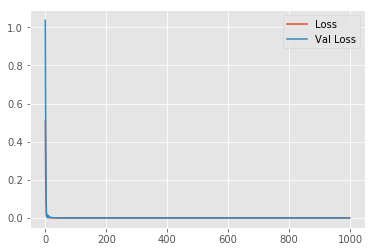

In [11]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [12]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [13]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.00046, 154.     , 154.9996 , 155.99948, 156.99936, 157.99924,
       158.99911, 159.999  , 160.99886, 161.99875, 162.99863, 163.99849,
       164.99837, 165.99756, 166.99643, 167.99509, 168.99362, 169.99219,
       170.99075, 171.98932, 172.98788, 173.98645, 174.985  , 175.98357,
       176.98212, 177.98068, 178.97925, 179.97781, 180.97638, 181.97491,
       182.97348, 183.97205, 184.97061, 185.96918, 186.96774, 187.96628,
       188.96484], dtype=float32)

In [14]:
# adjusting predicited y_test values by rounding 

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [15]:
# look into original y_test values

scaler.inverse_transform(y_test).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

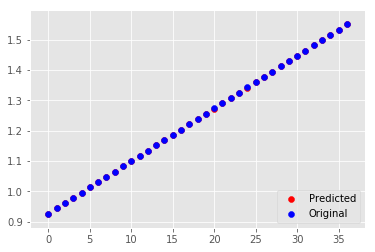

In [16]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

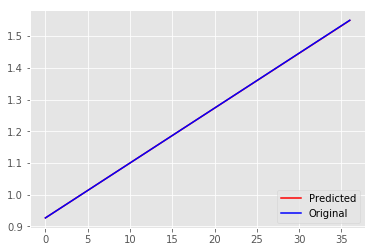

In [17]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [18]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)


X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [19]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [20]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [21]:
# look into original y_test values

scaler.inverse_transform(Y_test).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])

In [22]:
# last_xx values are not correctly feed  
future_predictions = []


last_x = x_test[-1] 

while len(future_predictions) < 30:
  p = model.predict([last_x.reshape(1, 5, 1)])[0,0] 
  future_predictions.append(p) 
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
  

In [23]:
np.round(scaler.inverse_transform(future_predictions))

array([189., 190., 191., 192., 193., 194., 195., 196., 197., 198., 199.,
       200., 201., 202., 203., 204., 205., 206., 207., 208., 209., 209.,
       210., 211., 212., 213., 214., 215., 216., 217.], dtype=float32)